<a href="https://colab.research.google.com/github/BhojRajBist/BhojRajBist/blob/main/Copy_of_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-4-e231992a1d40>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = {'Month': pd.date_range(start='2019-01-01', periods=66, freq='M'),  # Adjusting the start and freq
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


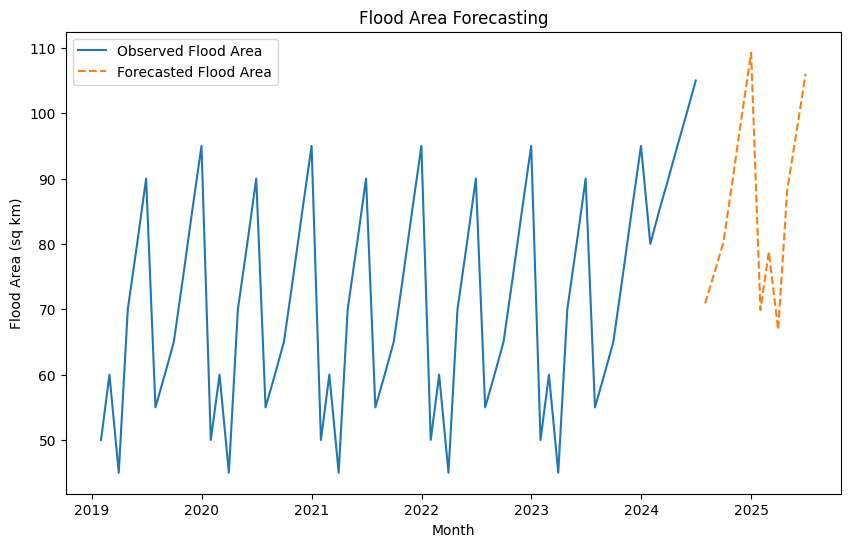

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Example data: Monthly flood areas in square kilometers (dummy data)
data = {'Month': pd.date_range(start='2019-01-01', periods=66, freq='M'),  # Adjusting the start and freq
        'FloodArea': [50, 60, 45, 70, 80, 90, 55, 60, 65, 75, 85, 95] * 5 + [80, 85, 90, 95, 100, 105]} # Extended data to match

# Creating a DataFrame and setting 'Month' as the index
df = pd.DataFrame(data).set_index('Month')

# Train a forecasting model
model = ExponentialSmoothing(df['FloodArea'], seasonal='add', seasonal_periods=12).fit()

# Forecast the next 12 months
forecast = model.forecast(12)

# Plot the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(df['FloodArea'], label='Observed Flood Area')
plt.plot(forecast, label='Forecasted Flood Area', linestyle='--')
plt.title('Flood Area Forecasting')
plt.xlabel('Month')
plt.ylabel('Flood Area (sq km)')
plt.legend()
plt.show()


<ipython-input-3-1f71992dd1eb>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = {'Month': pd.date_range(start='2019-01-01', periods=66, freq='M'),  # Adjusting the start and freq
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


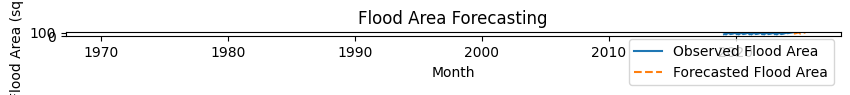

In [ ]:
# prompt: generate the code for the spatial work

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Example data: Monthly flood areas in square kilometers (dummy data)
data = {'Month': pd.date_range(start='2019-01-01', periods=66, freq='M'),  # Adjusting the start and freq
        'FloodArea': [50, 60, 45, 70, 80, 90, 55, 60, 65, 75, 85, 95] * 5 + [80, 85, 90, 95, 100, 105]} # Extended data to match

# Creating a DataFrame and setting 'Month' as the index
df = pd.DataFrame(data).set_index('Month')

# Train a forecasting model
model = ExponentialSmoothing(df['FloodArea'], seasonal='add', seasonal_periods=12).fit()

# Forecast the next 12 months
forecast = model.forecast(12)

# Example spatial data (replace with your actual flood area polygons)
# Create a sample polygon for the flood area (latitude, longitude)
polygon = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
gdf = gpd.GeoDataFrame({'FloodArea': [100]}, geometry=[polygon], crs='epsg:4326')


# Plot the original data and the forecast (including spatial element)
fig, ax = plt.subplots(figsize=(10, 6))
gdf.plot(ax=ax, color='red', alpha=0.5) # Add a layer for flood area polygon

ax.plot(df.index, df['FloodArea'], label='Observed Flood Area')
ax.plot(forecast.index, forecast, label='Forecasted Flood Area', linestyle='--')

plt.title('Flood Area Forecasting')
plt.xlabel('Month')
plt.ylabel('Flood Area (sq km)')
plt.legend()
plt.show()